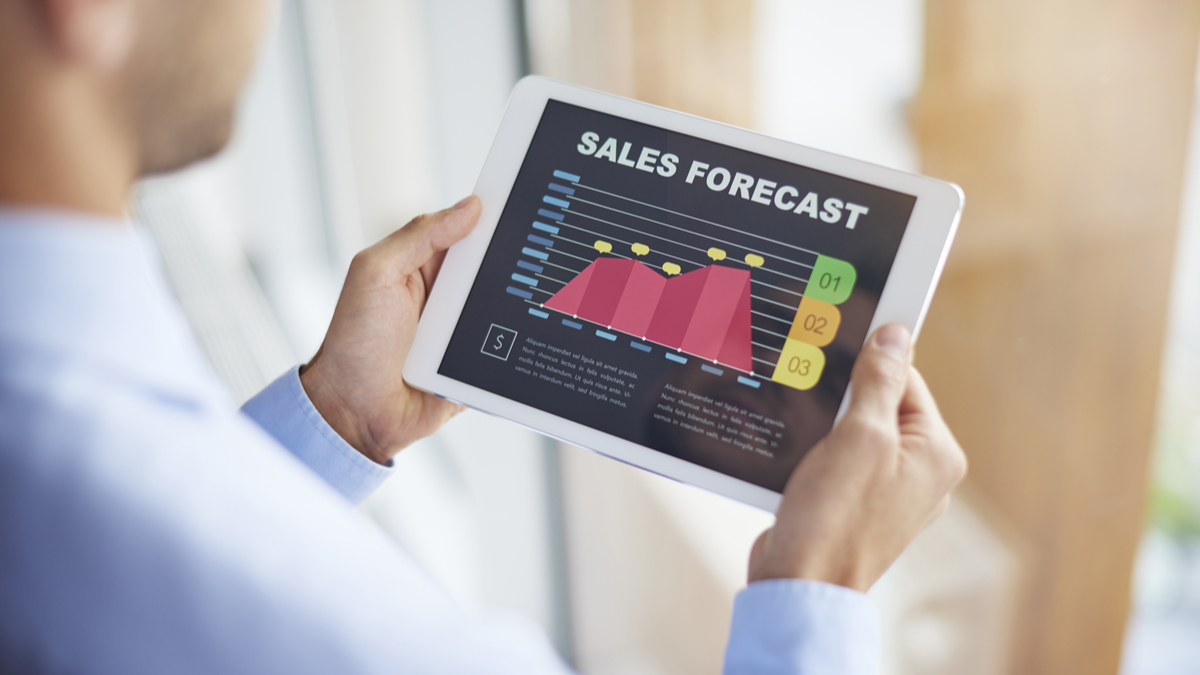

# **Sales Prediction Project**
#          - by **Sreya Bhattacharya**
 Submitted for Data Science Task in **CODSOFT** for *Internship*

In [ ]:
import os

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

Let's have a quick look on the dataset.

In [ ]:
df=pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.shape

(200, 4)

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.duplicated().sum()

0

We can see that there is not any null cell or any duplicate cell.

In [ ]:
px.scatter(df,x='TV',y='Sales',width=800,height=500, title='Sales vs TV')

In [ ]:
px.scatter(df,x='Radio',y='Sales',width=800,height=500, title='Radio vs TV')

In [ ]:
px.scatter(df,x='Newspaper',y='Sales',width=800,height=500, title='Newspaper vs TV')

From the scatter plots we can say Tv is positively correlated with sells where Radio or Newspapers are unpredictable.

<Axes: ylabel='Frequency'>

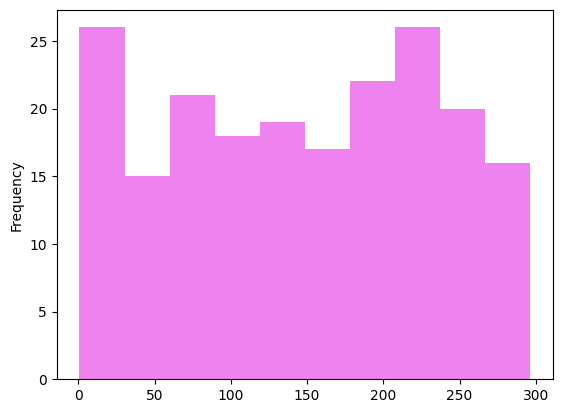

In [ ]:
df['TV'].plot.hist(bins=10,color="violet",xlabel="TV")

<Axes: ylabel='Frequency'>

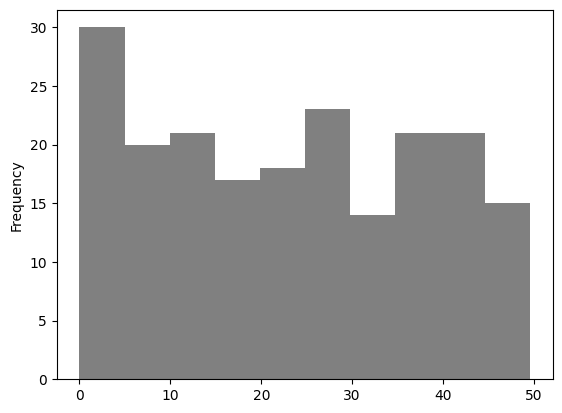

In [ ]:
df['Radio'].plot.hist(bins=10,color="grey",xlabel="Radio")

<Axes: ylabel='Frequency'>

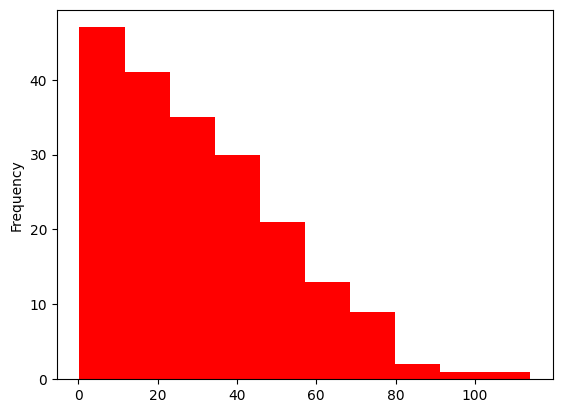

In [ ]:
df['Newspaper'].plot.hist(bins=10,color="red",xlabel="Newspaper")

<function matplotlib.pyplot.show(close=None, block=None)>

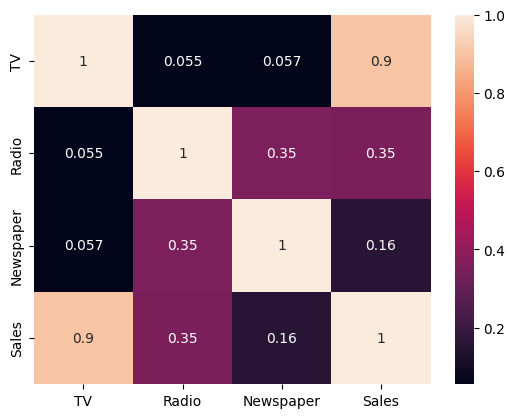

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show

From this heatmap we can say that TV is highly correlated with Sales.

In [ ]:
x=df.drop('Sales',axis=1)
y=df['Sales']

Now we'll split the dataset into Train and Test data in 70:30 ratio.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state = 0)

In [ ]:
print(x_train)

        TV  Radio  Newspaper
131  265.2    2.9       43.0
96   197.6    3.5        5.9
181  218.5    5.4       27.4
19   147.3   23.9       19.1
153  171.3   39.7       37.7
..     ...    ...        ...
67   139.3   14.5       10.2
192   17.2    4.1       31.6
117   76.4    0.8       14.8
47   239.9   41.5       18.5
172   19.6   20.1       17.0

[140 rows x 3 columns]


In [ ]:
print(y_train)

131    17.7
96     16.7
181    17.2
19     14.6
153    16.0
       ... 
67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: Sales, Length: 140, dtype: float64


In [ ]:
lr= LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
print("intercep",lr.intercept_)
print("coefficents: ")
list(zip(x,lr.coef_))


intercep 4.669247212392522
coefficents: 


[('TV', 0.05365016513958255),
 ('Radio', 0.11073062197220998),
 ('Newspaper', 0.00203697457651085)]

In [ ]:
y_pred= lr.predict(x_test)
print("prediction{}", format(y_pred))

prediction{} [10.68909303  8.67371102  9.59969914 24.99989846 14.73590568  8.37604918
 10.70350416 18.37670708  9.9670026  17.87946837 23.52765543 10.70692059
 13.37566958 17.10051561 11.77005197 13.31194616 21.13395461  9.10945664
 14.24009701 18.86885012 25.00670623 12.42508633 16.61899482 13.84289673
  7.80458355 15.13012055 14.69687153 20.70140682 16.9844145   8.94984434
 12.59168427 20.93257626 21.34337227 21.89151357  7.23908022  7.06001103
  9.28335812 15.6840471  13.33894748  7.28903633 11.05676585  9.08768206
 15.60592891 18.21716827 18.9560652  13.47385617  5.36520991 10.59696871
 15.66036131 10.98229096 12.20805533 20.70970272 20.70533061 16.95931925
  9.96622132  9.44413497 23.60505449 15.99066008 18.06706692  8.25675464]


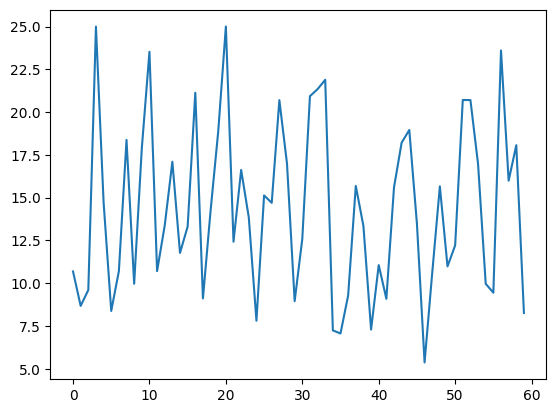

In [ ]:
plt.plot(y_pred)

In [ ]:
lr_dif= pd.DataFrame({"ir":y_test, "coe":y_pred})
lr_dif.head()

,ir,coe
18,11.3,10.689093
170,8.4,8.673711
107,12.0,9.599699
98,25.4,24.999898
177,16.7,14.735906


from matplotlib import pyplot as plt
_df_0['ir'].plot(kind='hist', bins=20, title='ir')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()

from matplotlib import pyplot as plt
_df_1['coe'].plot(kind='hist', bins=20, title='coe')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 6))
_df_2.plot(kind='scatter', x='ir', y='coe', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()

from matplotlib import pyplot as plt
_df_3['ir'].plot(kind='line', figsize=(8, 4), title='ir')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()

from matplotlib import pyplot as plt
_df_4['coe'].plot(kind='line', figsize=(8, 4), title='coe')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()

From this table and charts we can see the diff b/w original and predicted values.

In [ ]:
r2_score(y_test,y_pred)

0.9031541781049791

So, from the calculations we can say the model we chose fits very well our data as the r2 score is very high.

**Acknowledgement:**

I would like to express my special thanks of gratitude to CODSOFT for giving
me the golden opportunity to do the project on the wonderful topic which
helped me doing a lot of research and I came to know about so many things. It
helped me increase my knowledge and skills.